## Load Data

In [1]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [2]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Normalization Inside Network (Custom Layer (Norm))

In [3]:
class MyNormalization(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MyNormalization, self).__init__(**kwargs)
    def call(self, x):
        mean = tf.math.reduce_mean(x)
        std = tf.math.reduce_std(x)
        return (x - mean)/std

In [4]:
# solution 4: Normalization inside network (custom layer (norm))

initializer = tf.keras.initializers.RandomNormal()

model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(MyNormalization())
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))


# optimizer and loss
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 6s - loss: 1.7550 - accuracy: 0.4924 - val_loss: 1.3711 - val_accuracy: 0.6671 - 6s/epoch - 50ms/step
Epoch 2/300
118/118 - 1s - loss: 1.1861 - accuracy: 0.7045 - val_loss: 1.0636 - val_accuracy: 0.7246 - 1s/epoch - 9ms/step
Epoch 3/300
118/118 - 1s - loss: 0.9607 - accuracy: 0.7464 - val_loss: 0.9021 - val_accuracy: 0.7465 - 1s/epoch - 10ms/step
Epoch 4/300
118/118 - 1s - loss: 0.8279 - accuracy: 0.7658 - val_loss: 0.8079 - val_accuracy: 0.7549 - 904ms/epoch - 8ms/step
Epoch 5/300
118/118 - 1s - loss: 0.7478 - accuracy: 0.7768 - val_loss: 0.7337 - val_accuracy: 0.7741 - 808ms/epoch - 7ms/step
Epoch 6/300
118/118 - 1s - loss: 0.6856 - accuracy: 0.7894 - val_loss: 0.6832 - val_accuracy: 0.7827 - 779ms/epoch - 7ms/step
Epoch 7/300
118/118 - 1s - loss: 0.6445 - accuracy: 0.7988 - val_loss: 0.6455 - val_accuracy: 0.7945 - 809ms/epoch - 7ms/step
Epoch 8/300
118/118 - 1s - loss: 0.6119 - accuracy: 0.8054 - val_loss: 0.6494 - val_accuracy: 0.7789 - 807ms/epoch - 7ms/step

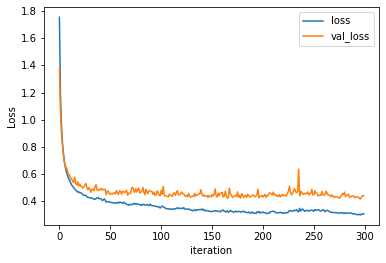

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

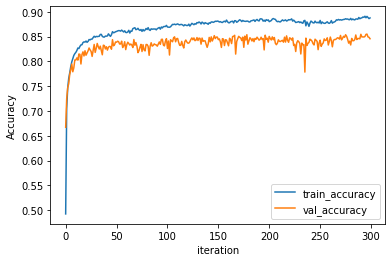

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()